## Inteligență Artificială  Tema 1 - 2025: Sokoban

Responsabili:
- Andrei Olaru
- Cătălin Chiru
- Andrei Dugăeșescu
- Mihai Nan
- Vlad Matei Drăghici
- Alexandru Baciu
- Bogdan-Andrei Sprîncenatu

In [1]:
from sokoban import Map, save_images, create_gif
import time

#### Saving all maps and map names and preparing for searches

In [2]:
import os
from search_methods.solver import Solver

directory_path = "tests"

maps = []
maps_name = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    maps.append(Map.from_yaml(file_path))
    maps_name.append(os.path.splitext(filename)[0])   

import search_methods.heuristics as h

# map = Map.from_yaml('tests/easy_map1.yaml')
# solver = Solver( map, "large_map2", "lrta", h.eval_lrta_bfs_box_order,)
# solver.solve(False)

#### Beam search with Manhattan results

In [3]:
beam_manh_results = []
beam_manh_no_states = []
beam_manh_pull_moves = []
beam_manh_time = []

i = 0
for map in maps:
    print("-----" + maps_name[i] + "-------")
    solver = Solver(map, "manh" + maps_name[i], "beam", h.eval_beam_search_manhattan)
    res = solver.solve(save_gif=False)
    beam_manh_results.append(res)
    beam_manh_no_states.append(solver.solver.no_states)
    if res:
        beam_manh_pull_moves.append(res.undo_moves)
    else:
        beam_manh_pull_moves.append(-10)
    beam_manh_time.append(solver.solver.exec_time)
    i += 1

-----easy_map1-------
box1
(4, 4)
-------beam search-----
GIF saved at: images/gif/beam/manheasy_map1/manheasy_map1.gif
number of explored states is 385
number of undo moves is 1
-----easy_map2-------
box1
(4, 4)
-------beam search-----
GIF saved at: images/gif/beam/manheasy_map2/manheasy_map2.gif
number of explored states is 221
number of undo moves is 0
-----hard_map1-------
box1
(6, 5)
box2
(0, 4)
box4
(0, 1)
box3
(1, 0)
-------beam search-----
GIF saved at: images/gif/beam/manhhard_map1/manhhard_map1.gif
number of explored states is 5780
number of undo moves is 4
-----hard_map2-------
box1
(7, 4)
box2
(0, 4)
-------beam search-----
GIF saved at: images/gif/beam/manhhard_map2/manhhard_map2.gif
number of explored states is 2224
number of undo moves is 0
-----large_map1-------
box2
(5, 6)
box1
(6, 8)
-------beam search-----
GIF saved at: images/gif/beam/manhlarge_map1/manhlarge_map1.gif
number of explored states is 2668
number of undo moves is 0
-----large_map2-------
box1
(5, 4)
box3

#### Beam search with BFS results

In [4]:
beam_bfs_results = []
beam_bfs_no_states = []
beam_bfs_pull_moves = []
beam_bfs_time = []

i = 0
for map in maps:
    print("-----" + maps_name[i] + "-------")
    solver = Solver(map, "bfs" + maps_name[i], "beam", h.eval_beam_search_bfs)
    res = solver.solve(save_gif=False)
    beam_bfs_results.append(res)
    beam_bfs_no_states.append(solver.solver.no_states)
    if res:
        beam_bfs_pull_moves.append(res.undo_moves)
    else:
        beam_bfs_pull_moves.append(-10)
    beam_bfs_time.append(solver.solver.exec_time)
    i += 1

-----easy_map1-------
box1
(4, 4)
-------beam search-----
GIF saved at: images/gif/beam/bfseasy_map1/bfseasy_map1.gif
number of explored states is 385
number of undo moves is 1
-----easy_map2-------
box1
(4, 4)
-------beam search-----
GIF saved at: images/gif/beam/bfseasy_map2/bfseasy_map2.gif
number of explored states is 221
number of undo moves is 0
-----hard_map1-------
box1
(6, 5)
box2
(0, 4)
box4
(0, 1)
box3
(1, 0)
-------beam search-----
GIF saved at: images/gif/beam/bfshard_map1/bfshard_map1.gif
number of explored states is 3794
number of undo moves is 3
-----hard_map2-------
box1
(7, 4)
box2
(0, 4)
-------beam search-----
GIF saved at: images/gif/beam/bfshard_map2/bfshard_map2.gif
number of explored states is 2192
number of undo moves is 0
-----large_map1-------
box2
(5, 6)
box1
(6, 8)
-------beam search-----
GIF saved at: images/gif/beam/bfslarge_map1/bfslarge_map1.gif
number of explored states is 2187
number of undo moves is 1
-----large_map2-------
box1
(5, 4)
box3
(3, 8)
bo

#### LRTA* with Manhattan results

In [5]:
lrta_manh_results = []
lrta_manh_no_states = []
lrta_manh_pull_moves = []
lrta_manh_time = []

i = 0
for map in maps:
    print("-----" + maps_name[i] + "-------")
    solver = Solver(map, "manh" + maps_name[i], "lrta", h.eval_lrta_manhatten)
    res, pull_moves = solver.solve(save_gif=False)
    lrta_manh_results.append(res)
    lrta_manh_no_states.append(solver.solver.no_states)
    lrta_manh_pull_moves.append(pull_moves)
    lrta_manh_time.append(solver.solver.exec_time)
    i += 1

-----easy_map1-------
box1
(4, 4)
------lrta* search-----
again
&&&&&&&&
++++30
pull moves 1
again
&&&&&&&&
++++48
pull moves 2
again
&&&&&&&&
++++42
pull moves 1
again
&&&&&&&&
++++34
pull moves 0

_ _ _ P B 
_ / _ / / 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
number of explored states is 305
number of undo moves is 0
-----easy_map2-------
box1
(4, 4)
------lrta* search-----
again
&&&&&&&&
++++12
pull moves 0
None
-----hard_map1-------
box4
(6, 5)
box1
(0, 4)
box2
(0, 1)
box3
(1, 0)
------lrta* search-----
again
&&&&&&&&
++++107
pull moves 8
again
&&&&&&&&
++++67
pull moves 4
again
&&&&&&&&
++++41
pull moves 1
again
&&&&&&&&
++++57
pull moves 2
again
&&&&&&&&
++++119
pull moves 8

/ / / / / _ 
/ / / / _ B 
/ / / / _ _ 
/ / / / _ _ 
/ / / _ _ _ 
/ / / _ _ _ 
B _ _ / P _ 
/ B _ _ B _ 
number of explored states is 214
number of undo moves is 1
-----hard_map2-------
box1
(7, 4)
box2
(0, 4)
------lrta* search-----
again
&&&&&&&&
++++86
pull moves 3
again
&&&&&&&&
++++126
pull moves 8
again
&&&&&&&

#### LRTA* with BFS and closest box

In [6]:
lrta_bfs_no_results = []
lrta_bfs_no_no_states = []
lrta_bfs_no_pull_moves = []
lrta_bfs_no_time = []

i = 0
for map in maps:
    print("-----" + maps_name[i] + "-------")
    solver = Solver(map, "bfs_closest" + maps_name[i], "lrta", h.eval_lrta_bfs_no_box_order)
    res, pull_moves = solver.solve(save_gif=False)
    lrta_bfs_no_results.append(res)
    lrta_bfs_no_no_states.append(solver.solver.no_states)
    lrta_bfs_no_pull_moves.append(pull_moves)
    lrta_bfs_no_time.append(solver.solver.exec_time)

    i += 1

-----easy_map1-------
box1
(4, 4)
------lrta* search-----
again
&&&&&&&&
++++18
pull moves 1
again
&&&&&&&&
++++46
pull moves 0

_ _ _ P B 
_ / _ / / 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
number of explored states is 583
number of undo moves is 0
-----easy_map2-------
box1
(4, 4)
------lrta* search-----
again
&&&&&&&&
++++12
pull moves 0
None
-----hard_map1-------
box4
(6, 5)
box1
(0, 4)
box2
(0, 1)
box3
(1, 0)
------lrta* search-----
again
&&&&&&&&
++++65
pull moves 3
again
&&&&&&&&
++++35
pull moves 1
again
&&&&&&&&
++++55
pull moves 4
again
&&&&&&&&
++++35
pull moves 1
again
&&&&&&&&
++++31
pull moves 1

/ / / / / _ 
/ / / / _ B 
/ / / / _ _ 
/ / / / _ _ 
/ / / _ _ _ 
/ / / _ _ _ 
B _ _ / P _ 
/ B _ _ B _ 
number of explored states is 178
number of undo moves is 1
-----hard_map2-------
box1
(7, 4)
box2
(0, 4)
------lrta* search-----
again
&&&&&&&&
++++90
pull moves 3
again
&&&&&&&&
++++61
pull moves 1
again
&&&&&&&&
++++146
pull moves 6
again
&&&&&&&&
++++69
pull moves 1
again
pull move

#### LRTA* with BFS and box order

In [7]:
lrta_bfs_results = []
lrta_bfs_no_states = []
lrta_bfs_pull_moves = []
lrta_bfs_time = []

i = 0
for map in maps:
    print("-----" + maps_name[i] + "-------")
    solver = Solver(map, "bfs order" + maps_name[i], "lrta", h.eval_lrta_bfs_box_order)
    res, pull_moves = solver.solve(save_gif=False)
    lrta_bfs_results.append(res)
    lrta_bfs_no_states.append(solver.solver.no_states)
    lrta_bfs_pull_moves.append(pull_moves)
    lrta_bfs_time.append(solver.solver.exec_time)
    
    i += 1

-----easy_map1-------
box1
(4, 4)
------lrta* search-----
again
&&&&&&&&
++++30
pull moves 1
again
&&&&&&&&
++++26
pull moves 0

_ _ _ P B 
_ / _ / / 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
number of explored states is 233
number of undo moves is 0
-----easy_map2-------
box1
(4, 4)
------lrta* search-----
again
&&&&&&&&
++++12
pull moves 0
None
-----hard_map1-------
box4
(6, 5)
box1
(0, 4)
box2
(0, 1)
box3
(1, 0)
------lrta* search-----
again
&&&&&&&&
++++87
pull moves 4
again
&&&&&&&&
++++59
pull moves 1
again
&&&&&&&&
++++73
pull moves 2
again
&&&&&&&&
++++55
pull moves 1
again
&&&&&&&&
++++41
pull moves 1

/ / / / / _ 
/ / / / _ B 
/ / / / _ _ 
/ / / / _ _ 
/ / / _ _ _ 
/ / / _ _ _ 
B _ _ / P _ 
/ B _ _ B _ 
number of explored states is 290
number of undo moves is 1
-----hard_map2-------
box1
(7, 4)
box2
(0, 4)
------lrta* search-----
again
&&&&&&&&
++++55
pull moves 1
again
&&&&&&&&
++++53
pull moves 0

_ _ _ _ B 
_ / _ / / 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ _ _ _ _ 
_ / _ / / 
_ _ _ P 

#### Plotting graphics

In [8]:
import matplotlib.pyplot as plt
import numpy as np

categories = []
for filename in os.listdir(directory_path):
    name, ext = os.path.splitext(filename)
    categories.append(name)

#### Beam search results with different heuristics

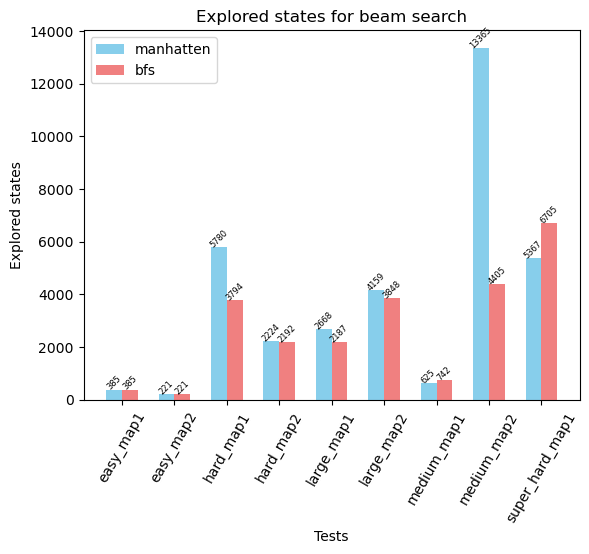

In [9]:
values1 = beam_manh_no_states
values2 = beam_bfs_no_states

x = np.arange(len(categories))

width = 0.3

plt.bar(x - width / 2, values1, width=width, label="manhatten", color="skyblue")
plt.bar(x + width / 2, values2, width=width, label="bfs", color="lightcoral")

for i in range(len(categories)):
    plt.text(x[i] - width/2, values1[i], str(values1[i]), ha='center', fontsize=6, rotation=45)
    plt.text(x[i] + width/2, values2[i], str(values2[i]), ha='center', fontsize=6, rotation=45)

plt.xticks(x, categories)

plt.xlabel("Tests")
plt.ylabel("Explored states")
plt.title("Explored states for beam search")
plt.xticks(rotation=60)
plt.legend()
plt.show()


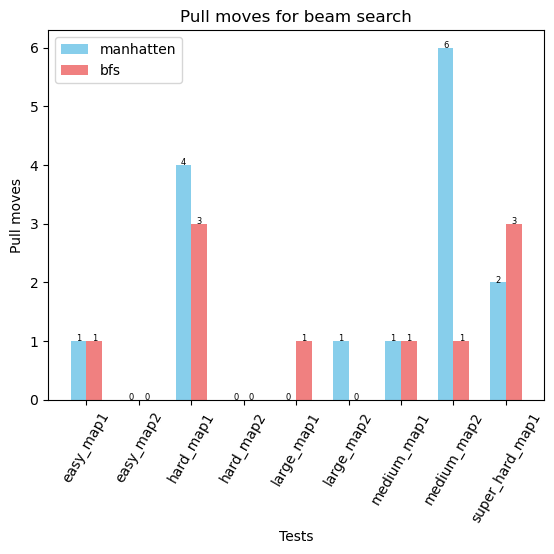

In [10]:
values1 = beam_manh_pull_moves
values2 = beam_bfs_pull_moves

x = np.arange(len(categories))

width = 0.3

plt.bar(x - width / 2, values1, width=width, label="manhatten", color="skyblue")
plt.bar(x + width / 2, values2, width=width, label="bfs", color="lightcoral")

for i in range(len(categories)):
    plt.text(x[i] - width/2, values1[i], str(values1[i]), ha='center', fontsize=6)
    plt.text(x[i] + width/2, values2[i], str(values2[i]), ha='center', fontsize=6)

plt.xticks(x, categories)

plt.xlabel("Tests")
plt.ylabel("Pull moves")
plt.title("Pull moves for beam search")
plt.xticks(rotation=60)
plt.legend()
plt.show()

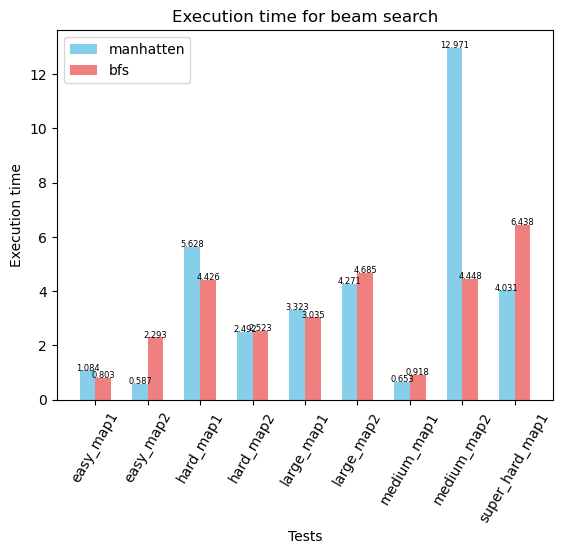

In [11]:
values1 = [round(x, 3) for x in beam_manh_time]
values2 = [round(x, 3) for x in beam_bfs_time]

x = np.arange(len(categories))

width = 0.3

plt.bar(x - width / 2, values1, width=width, label="manhatten", color="skyblue")
plt.bar(x + width / 2, values2, width=width, label="bfs", color="lightcoral")

for i in range(len(categories)):
    plt.text(x[i] - width/2, values1[i], str(values1[i]), ha='center', fontsize=6)
    plt.text(x[i] + width/2, values2[i], str(values2[i]), ha='center', fontsize=6)

plt.xticks(x, categories)

plt.xlabel("Tests")
plt.ylabel("Execution time")
plt.title("Execution time for beam search")
plt.xticks(rotation=60)
plt.legend()
plt.show()

#### LRTA* results with different heuristics

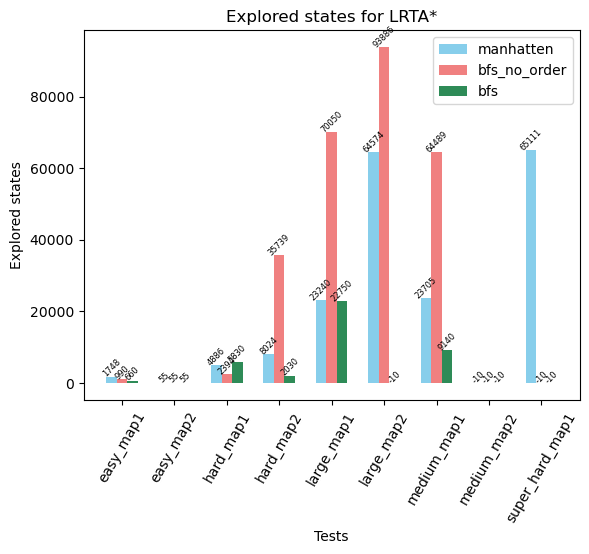

In [ ]:
values1 = lrta_manh_no_states
values2 = lrta_bfs_no_no_states
values3 = lrta_bfs_no_states

# import builtins
# values1 = list(builtins.map(lambda x: x if x < 100000 else -10, values1))
# values2 = list(builtins.map(lambda x: x if x < 100000 else -10, values2))
# values3 = list(builtins.map(lambda x: x if x < 100000 else -10, values3))

x = np.arange(len(categories))

width = 0.2

plt.bar(x - width, values1, width=width, label="manhatten", color="skyblue")
plt.bar(x, values2, width=width, label="bfs_no_order", color="lightcoral")
plt.bar(x + width, values3, width=width, label="bfs", color="seagreen")

for i in range(len(categories)):
    plt.text(x[i] - width, values1[i], str(values1[i]), ha='center', fontsize=6, rotation=45)
    plt.text(x[i], values2[i], str(values2[i]), ha='center', fontsize=6, rotation=45)
    plt.text(x[i] + width, values3[i], str(values3[i]), ha='center', fontsize=6, rotation=45)

plt.xticks(x, categories)

plt.xlabel("Tests")
plt.ylabel("Explored states")
plt.title("Explored states for LRTA*")
plt.xticks(rotation=60)
plt.legend()
plt.show()

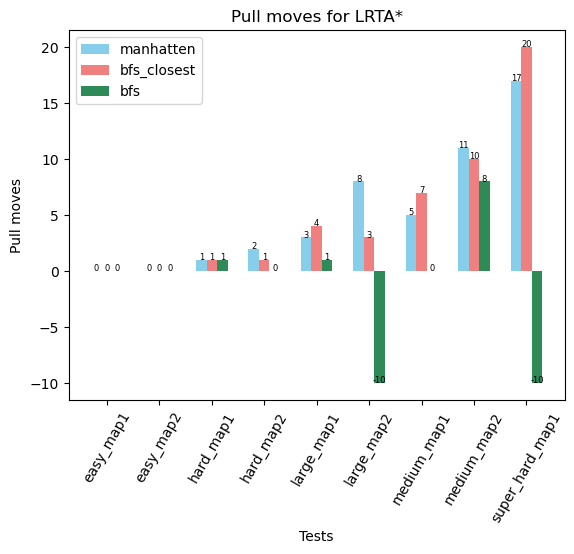

In [13]:
values1 = lrta_manh_pull_moves
values2 = lrta_bfs_no_pull_moves
values3 = lrta_bfs_pull_moves

x = np.arange(len(categories))

width = 0.2

plt.bar(x - width, values1, width=width, label="manhatten", color="skyblue")
plt.bar(x, values2, width=width, label="bfs_closest", color="lightcoral")
plt.bar(x + width, values3, width=width, label="bfs", color="seagreen")

for i in range(len(categories)):
    plt.text(x[i] - width, values1[i], str(values1[i]), ha='center', fontsize=6)
    plt.text(x[i], values2[i], str(values2[i]), ha='center', fontsize=6)
    plt.text(x[i] + width, values3[i], str(values3[i]), ha='center', fontsize=6)

plt.xticks(x, categories)

plt.xlabel("Tests")
plt.ylabel("Pull moves")
plt.title("Pull moves for LRTA*")
plt.xticks(rotation=60)
plt.legend()
plt.show()

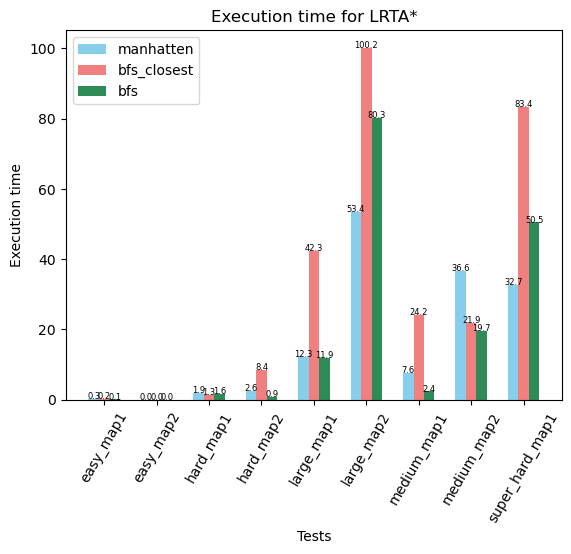

In [14]:
values1 = [round(x, 1) for x in lrta_manh_time]
values2 = [round(x, 1) for x in lrta_bfs_no_time]
values3 = [round(x, 1) for x in lrta_bfs_time]

x = np.arange(len(categories))

width = 0.2

plt.bar(x - width, values1, width=width, label="manhatten", color="skyblue")
plt.bar(x, values2, width=width, label="bfs_closest", color="lightcoral")
plt.bar(x + width, values3, width=width, label="bfs", color="seagreen")

for i in range(len(categories)):
    plt.text(x[i] - width, values1[i], str(values1[i]), ha='center', fontsize=6)
    plt.text(x[i], values2[i], str(values2[i]), ha='center', fontsize=6)
    plt.text(x[i] + width, values3[i], str(values3[i]), ha='center', fontsize=6)

plt.xticks(x, categories)

plt.xlabel("Tests")
plt.ylabel("Execution time")
plt.title("Execution time for LRTA*")
plt.xticks(rotation=60)
plt.legend()
plt.show()

### Comparisons

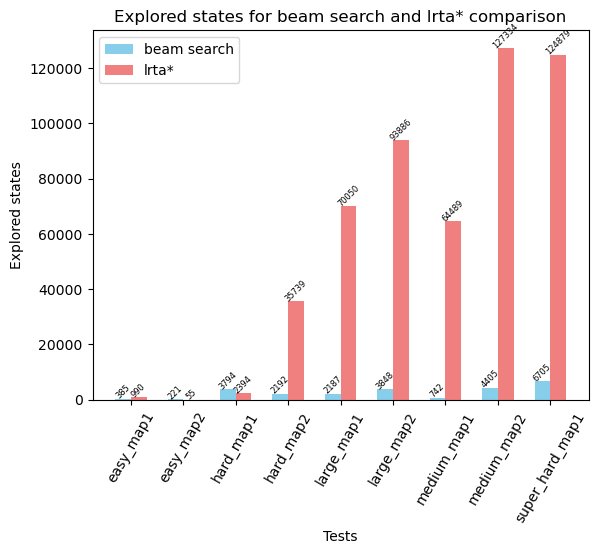

In [15]:
values1 = beam_bfs_no_states
values2 = lrta_bfs_no_no_states

x = np.arange(len(categories))

width = 0.3

plt.bar(x - width / 2, values1, width=width, label="beam search", color="skyblue")
plt.bar(x + width / 2, values2, width=width, label="lrta*", color="lightcoral")

for i in range(len(categories)):
    plt.text(x[i] - width/2, values1[i], str(values1[i]), ha='center', fontsize=6, rotation=45)
    plt.text(x[i] + width/2, values2[i], str(values2[i]), ha='center', fontsize=6, rotation=45)

plt.xticks(x, categories)

plt.xlabel("Tests")
plt.ylabel("Explored states")
plt.title("Explored states for beam search and lrta* comparison")
plt.xticks(rotation=60)
plt.legend()
plt.show()

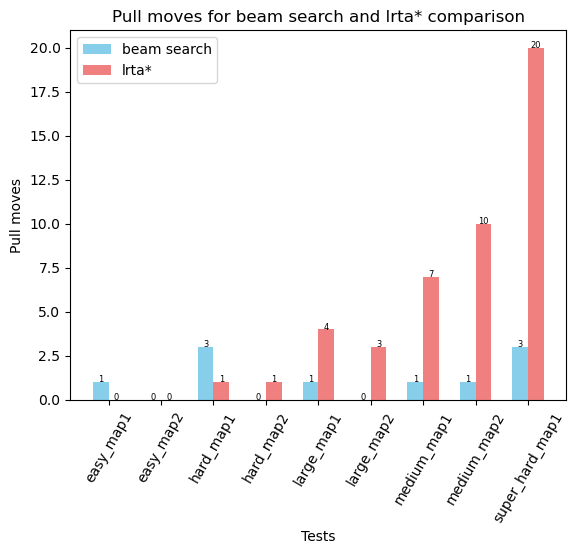

In [16]:
values1 = beam_bfs_pull_moves
values2 = lrta_bfs_no_pull_moves

x = np.arange(len(categories))

width = 0.3

plt.bar(x - width / 2, values1, width=width, label="beam search", color="skyblue")
plt.bar(x + width / 2, values2, width=width, label="lrta*", color="lightcoral")

for i in range(len(categories)):
    plt.text(x[i] - width/2, values1[i], str(values1[i]), ha='center', fontsize=6)
    plt.text(x[i] + width/2, values2[i], str(values2[i]), ha='center', fontsize=6)

plt.xticks(x, categories)

plt.xlabel("Tests")
plt.ylabel("Pull moves")
plt.title("Pull moves for beam search and lrta* comparison")
plt.xticks(rotation=60)
plt.legend()
plt.show()

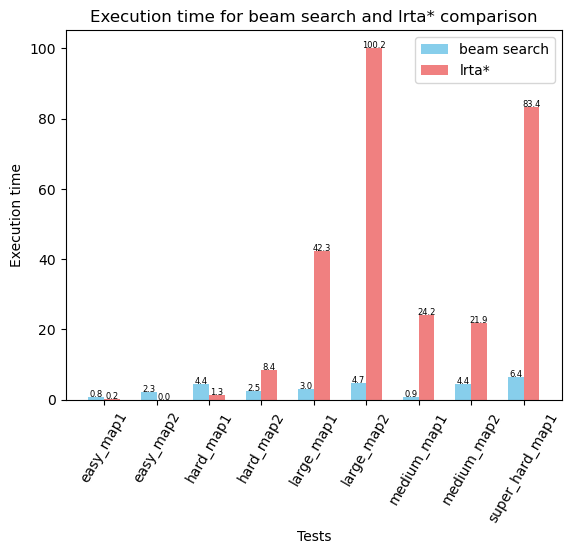

In [17]:
values1 = [round(x, 1) for x in beam_bfs_time]
values2 = [round(x, 1) for x in lrta_bfs_no_time]

x = np.arange(len(categories))

width = 0.3

plt.bar(x - width / 2, values1, width=width, label="beam search", color="skyblue")
plt.bar(x + width / 2, values2, width=width, label="lrta*", color="lightcoral")

for i in range(len(categories)):
    plt.text(x[i] - width/2, values1[i], str(values1[i]), ha='center', fontsize=6)
    plt.text(x[i] + width/2, values2[i], str(values2[i]), ha='center', fontsize=6)

plt.xticks(x, categories)

plt.xlabel("Tests")
plt.ylabel("Execution time")
plt.title("Execution time for beam search and lrta* comparison")
plt.xticks(rotation=60)
plt.legend()
plt.show()